In [1]:
# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf
import keras
from keras.layers import Dense,Dropout,Activation,Add,MaxPooling2D,Conv2D,Flatten,BatchNormalization,MaxPool2D
from keras.models import Sequential
from keras import layers
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing import image

In [3]:
train_data = tf.keras.preprocessing.image_dataset_from_directory(
    "C:/Users/hp/anaconda_work/project649/ayushdataset/asl_datasetAyush/asl_dataset", labels='inferred', label_mode='int', class_names=None,
    color_mode='rgb', batch_size=32, image_size=(50, 50), shuffle=True, seed=123,
    validation_split=0.2, subset="training"
)

Found 520 files belonging to 26 classes.
Using 416 files for training.


In [4]:
val_data = tf.keras.preprocessing.image_dataset_from_directory(
    "C:/Users/hp/anaconda_work/project649/ayushdataset/asl_datasetAyush/asl_dataset", labels='inferred', label_mode='int', class_names=None,
    color_mode='rgb', batch_size=32, image_size=(50, 50), shuffle=True, seed=123,
    validation_split=0.2, subset="validation"
)

Found 520 files belonging to 26 classes.
Using 104 files for validation.


In [5]:
#class names 
dict_labels = {0:"a",1:"b",2:"c",3:"d",4:"e",5:"f",6:"g",7:"h",8:"i",9:"j",10:"k",11:"l",12:"m",13:"n",14:"o",15:"p",16:"q",17:"r",18:"s",19:"t",20:"u",21:"unknown",22:"v",23:"w",24:"x",25:"y",26:"z"}

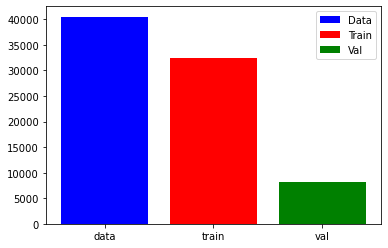

In [6]:
#visulaize data
fig, ax = plt.subplots()
ax.bar("data",40500 ,color= 'b', label='Data')
ax.bar("train",32400 ,color= 'r', label='Train')
ax.bar("val",8100 ,color='g', label='Val')
leg = ax.legend();

In [7]:
#build cnn 
model = Sequential()
model.add(BatchNormalization())
model.add(Conv2D(64, kernel_size=(3,3), activation = 'relu', input_shape=(50,50 ,3) ))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Conv2D(64, kernel_size = (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Conv2D(64, kernel_size = (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.20))
model.add(Dense(27, activation = 'softmax'))


In [8]:
model.compile(optimizer='Adam', metrics=['accuracy'], loss='sparse_categorical_crossentropy')

In [9]:
call = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    patience=5,
    restore_best_weights=True)

In [10]:
fit= model.fit(train_data,validation_data=val_data,epochs=15)
#,callbacks=[call]

Epoch 1/15
13/13 [==============================] - 4s 326ms/step - loss: 3.1334 - accuracy: 0.1322 - val_loss: 2.9325 - val_accuracy: 0.1923
Epoch 2/15
13/13 [==============================] - 3s 245ms/step - loss: 2.1026 - accuracy: 0.3846 - val_loss: 1.8158 - val_accuracy: 0.3558
Epoch 3/15
13/13 [==============================] - 4s 343ms/step - loss: 0.9244 - accuracy: 0.7115 - val_loss: 1.7037 - val_accuracy: 0.5577
Epoch 4/15
13/13 [==============================] - 4s 325ms/step - loss: 0.4858 - accuracy: 0.8438 - val_loss: 0.6238 - val_accuracy: 0.7788
Epoch 5/15
13/13 [==============================] - 4s 281ms/step - loss: 0.2444 - accuracy: 0.9207 - val_loss: 0.2316 - val_accuracy: 0.9327
Epoch 6/15
13/13 [==============================] - 4s 273ms/step - loss: 0.1500 - accuracy: 0.9447 - val_loss: 0.1410 - val_accuracy: 0.9423
Epoch 7/15
13/13 [==============================] - 3s 263ms/step - loss: 0.0890 - accuracy: 0.9736 - val_loss: 0.1329 - val_accuracy: 0.9615
Epoch 

In [16]:
model.evaluate(val_data)

4/4 [==============================] - 0s 34ms/step - loss: 0.0101 - accuracy: 1.0000


[0.010127987712621689, 1.0]

In [11]:
#plotting training values
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

acc = fit.history['accuracy']
val_acc = fit.history['val_accuracy']
loss = fit.history['loss']
val_loss = fit.history['val_loss']

print("Accuracy " , acc)
print(val_acc)
print(loss)
print(val_loss)

Accuracy  [0.13221153616905212, 0.38461539149284363, 0.7115384340286255, 0.84375, 0.9206730723381042, 0.9447115659713745, 0.973557710647583, 0.9831730723381042, 0.9879807829856873, 0.9879807829856873, 0.9903846383094788, 0.9927884340286255, 0.9927884340286255, 0.9927884340286255, 1.0]
[0.19230769574642181, 0.35576921701431274, 0.557692289352417, 0.7788461446762085, 0.932692289352417, 0.942307710647583, 0.9615384340286255, 0.942307710647583, 0.9903846383094788, 1.0, 1.0, 1.0, 0.9903846383094788, 1.0, 1.0]
[3.1334173679351807, 2.1025547981262207, 0.924383819103241, 0.48577743768692017, 0.24441035091876984, 0.15000951290130615, 0.08895446360111237, 0.05423809587955475, 0.060092806816101074, 0.035442519932985306, 0.034752607345581055, 0.027207668870687485, 0.01650184951722622, 0.016827881336212158, 0.005902988836169243]
[2.9324560165405273, 1.815815806388855, 1.703681230545044, 0.6237502694129944, 0.23156827688217163, 0.1410159468650818, 0.1328641176223755, 0.21773001551628113, 0.028123630

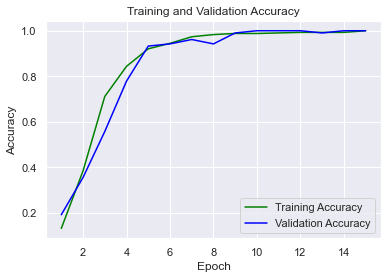

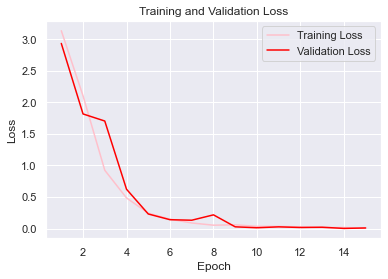

In [12]:
epochs = range(1, len(loss) + 1)
#accuracy plot
plt.plot(epochs, acc, color='green', label='Training Accuracy')
plt.plot(epochs, val_acc, color='blue', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

plt.figure()
#loss plot
plt.plot(epochs, loss, color='pink', label='Training Loss')
plt.plot(epochs, val_loss, color='red', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [19]:
model.save('modelCnnAyush.h5')
import cv2
import tensorflow as tf
# modelSaved = tf.keras.models.load_model('modelKhalid.h5')
# load and evaluate a saved model
from numpy import loadtxt
from keras.models import load_model
 
# load model
newmodel = load_model('modelCnnAyush.h5')
# summarize model.
newmodel.summary()

newmodel.evaluate(val_data)

# acc = model.history['accuracy']
# val_acc = model.history['val_accuracy']
# loss = model.history['loss']
# val_loss =model.history['val_loss']

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization (BatchNo (None, 50, 50, 3)         12        
_________________________________________________________________
conv2d (Conv2D)              (None, 48, 48, 64)        1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 24, 24, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 22, 22, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 11, 11, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 9, 9, 64)          36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 64)          0

[0.010127989575266838, 0.048076923936605453]

In [ ]:

pip install tensorflowjs
